### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter, MonthLocator

# Getting Started

In [3]:
dataset = pd.read_csv('opsd_germany_daily.csv')
dataset.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [4]:
dataset.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


# Indexing the dataset and creating additional columns for it

In [6]:
# setting the datee as the index
dataset.set_index('Date', inplace=True)
dataset.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [7]:
# adding year, month, and weekday as separete columns
dataset['Year'] = pd.DatetimeIndex(dataset.index).year
dataset['Month'] = pd.DatetimeIndex(dataset.index).month
dataset['Weekday'] = pd.DatetimeIndex(dataset.index).weekday
dataset['DayOfYear'] = pd.DatetimeIndex(dataset.index).dayofyear

# mapping the weekday to the actual name
dataset['Weekday'] = dataset['Weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

dataset.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday,DayOfYear
Date,,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday,1
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday,2
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday,3
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday,4
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday,5


# Germany’s Daily Energy Consumption 2006-2017

Use df.plot(...) to plot a time series of Germany’s daily energy Consumption from 2006-2017. Since pandas’ DataFrame plotting methods rely on matplotlib, you can use matplotlib.pyplot to style your plots. Set a custom marker, linestyle, title as well as labels for the x-, and y-axis.

Text(0, 0.5, 'Consumption in GWh')

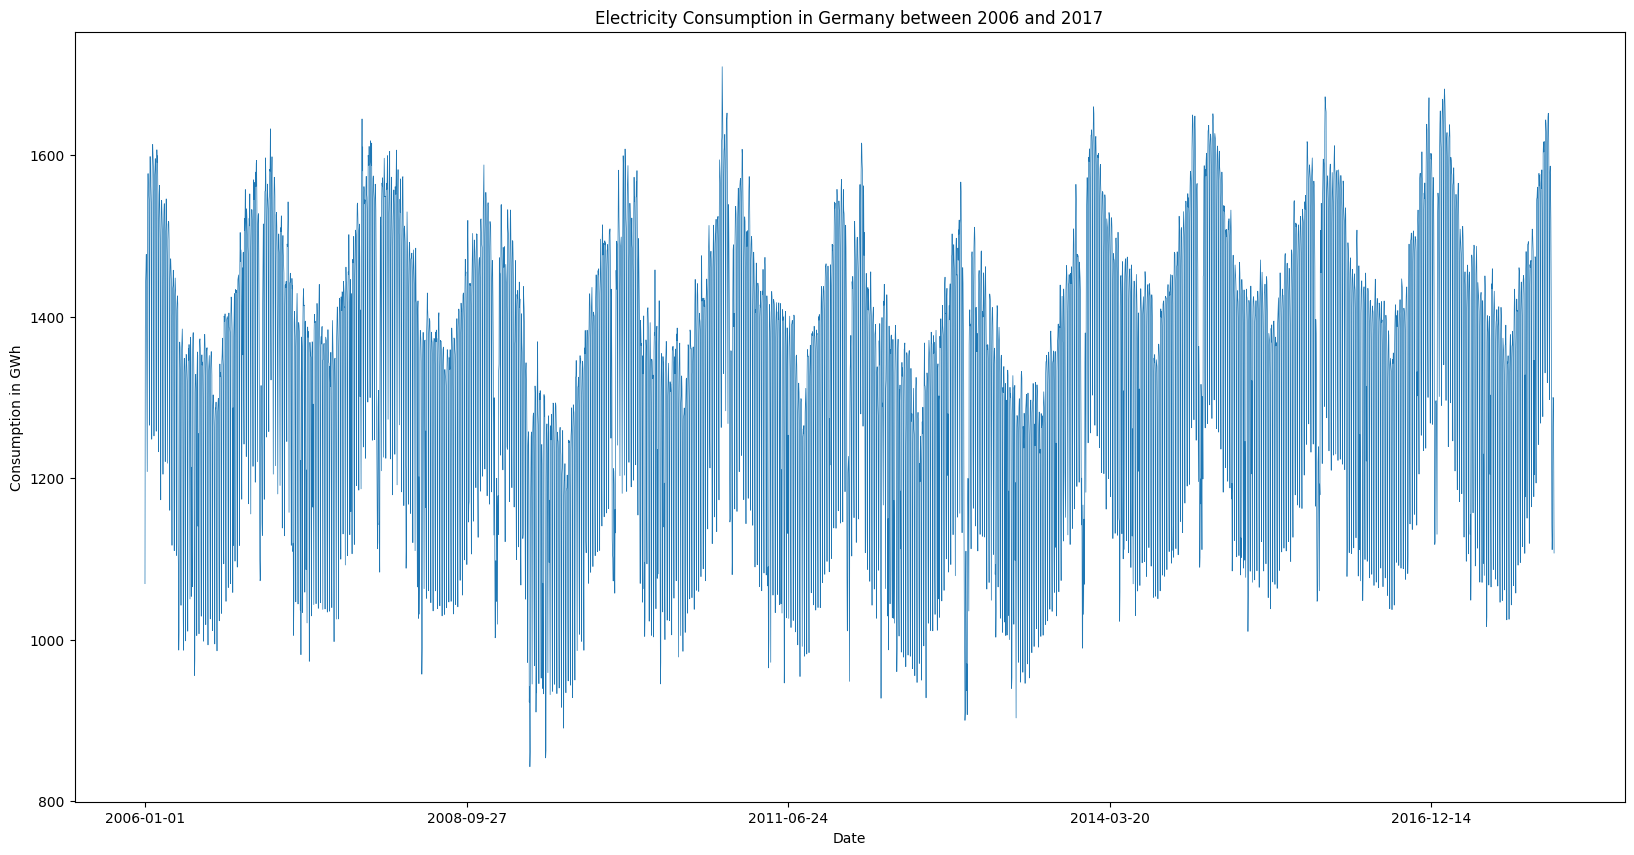

In [8]:
plt.figure(figsize=(20, 10))
dataset['Consumption'].plot(linestyle='-', linewidth=0.5)
plt.title('Electricity Consumption in Germany between 2006 and 2017')
plt.xlabel('Date')
plt.ylabel('Consumption in GWh')

# Subplots Showing Daily Consumption and Solar-, Wind-Generation
Next, generate one figure with three subplots containing time series for Wind, Solar and energy Consumption. Ensure that you properly represent the different magnitudes of renewable energy generation and power consumption by scaling the y-axis accordingly!

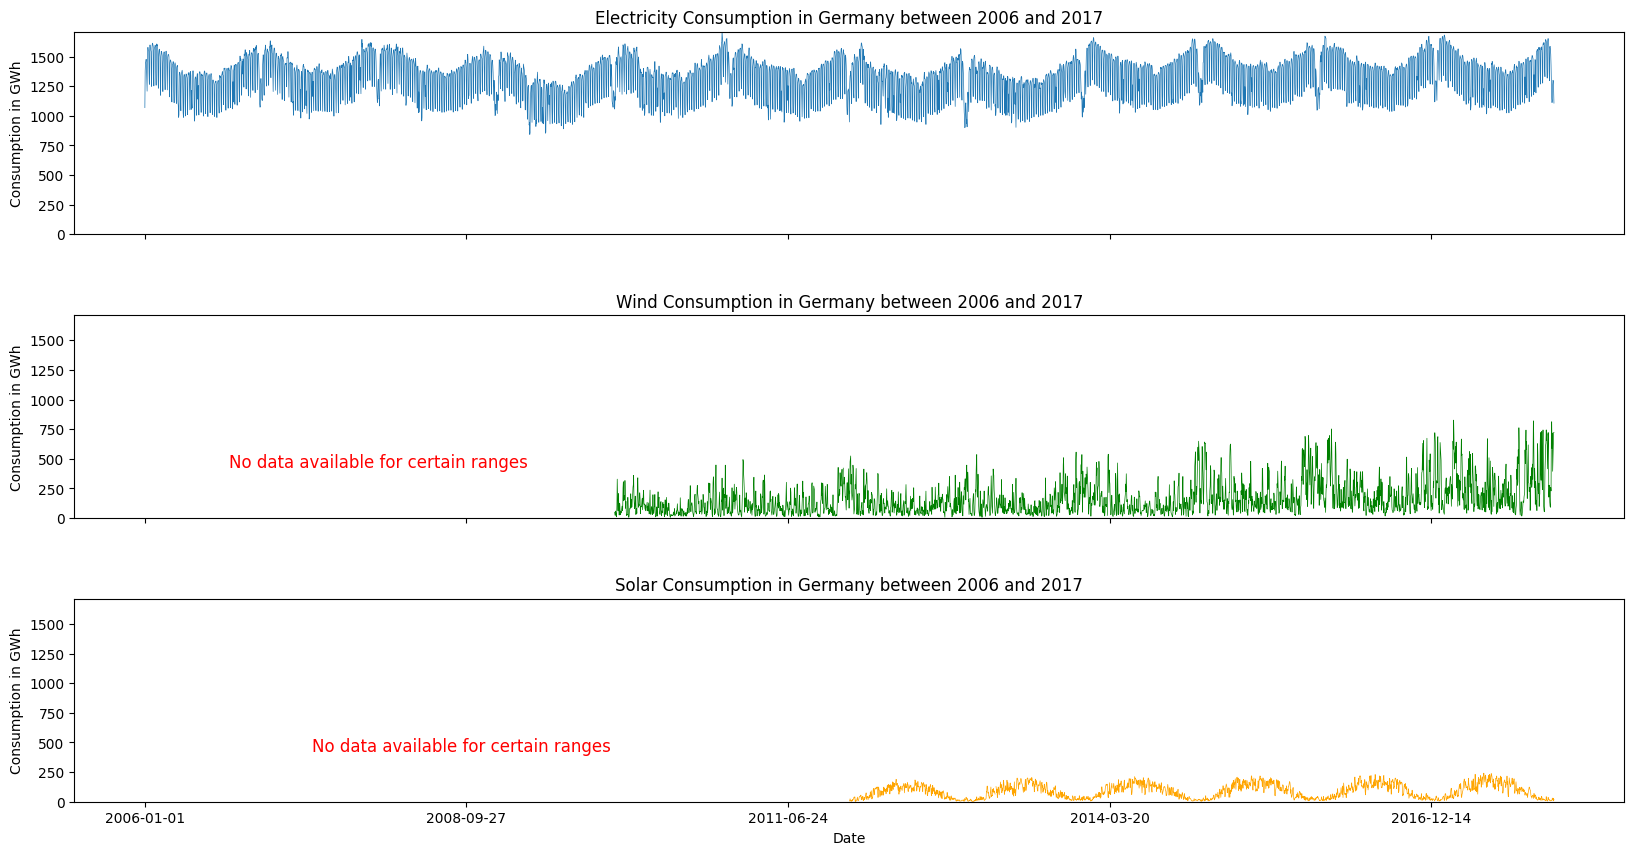

In [9]:
# creating a subplot
fig, ax = plt.subplots(3,1, figsize=(20, 10), sharex=True, sharey=True)


# plot 'Consumption'
dataset['Consumption'].plot(ax=ax[0], linestyle='-', linewidth=0.5)
ax[0].set_title('Electricity Consumption in Germany between 2006 and 2017')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Consumption in GWh')
ax[0].set_ylim(0, dataset['Consumption'].max())

# plot 'Wind'
dataset['Wind'].plot(ax=ax[1], linestyle='-', linewidth=0.5, color='green')
ax[1].set_title('Wind Consumption in Germany between 2006 and 2017')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Consumption in GWh')
ax[1].set_ylim(0, dataset['Consumption'].max())

# Add red text annotation below the Wind graph
ax[1].text(0.1, 0.25, 'No data available for certain ranges',
            color='red', fontsize=12, ha='left', transform=ax[1].transAxes)

# plot 'Solar'
dataset['Solar'].plot(ax=ax[2], linestyle='-', linewidth=0.5, color='orange')
ax[2].set_title('Solar Consumption in Germany between 2006 and 2017')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Consumption in GWh')
ax[2].set_ylim(0, dataset['Consumption'].max())

# Add red text annotation below the Solar graph
ax[2].text(0.25, 0.25, 'No data available for certain ranges',
            color='red', fontsize=12, ha='center', transform=ax[2].transAxes)

# adjust spacing between plots
plt.subplots_adjust(hspace=0.4)

plt.show()


# Can you Spot Patterns? 

Select a single year from the dataset using pandas’ timebased indexing (df.loc[...]) for
further examination. Plot this years Consumption in a time series plot. Be prepared to comment on what you see next session!

Next, Find a way to plot a boxplot showing the monthly energy Consumption in Germany from 2006-2017. You may e.g. use seaborn for this. What do you see?


In [10]:
# selecting the yer
SELECTED_YEAR = 2013
subset = dataset.loc[dataset['Year'] == SELECTED_YEAR]

subset.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday,DayOfYear
Date,,,,,,,,
2013-01-01,906.910,262.438,14.218,276.656,2013,1,Tuesday,1
2013-01-02,1160.174,224.867,26.010,250.877,2013,1,Wednesday,2
2013-01-03,1199.565,387.143,6.058,393.201,2013,1,Thursday,3
2013-01-04,1198.952,342.443,4.976,347.419,2013,1,Friday,4
2013-01-05,1108.271,140.410,4.970,145.380,2013,1,Saturday,5


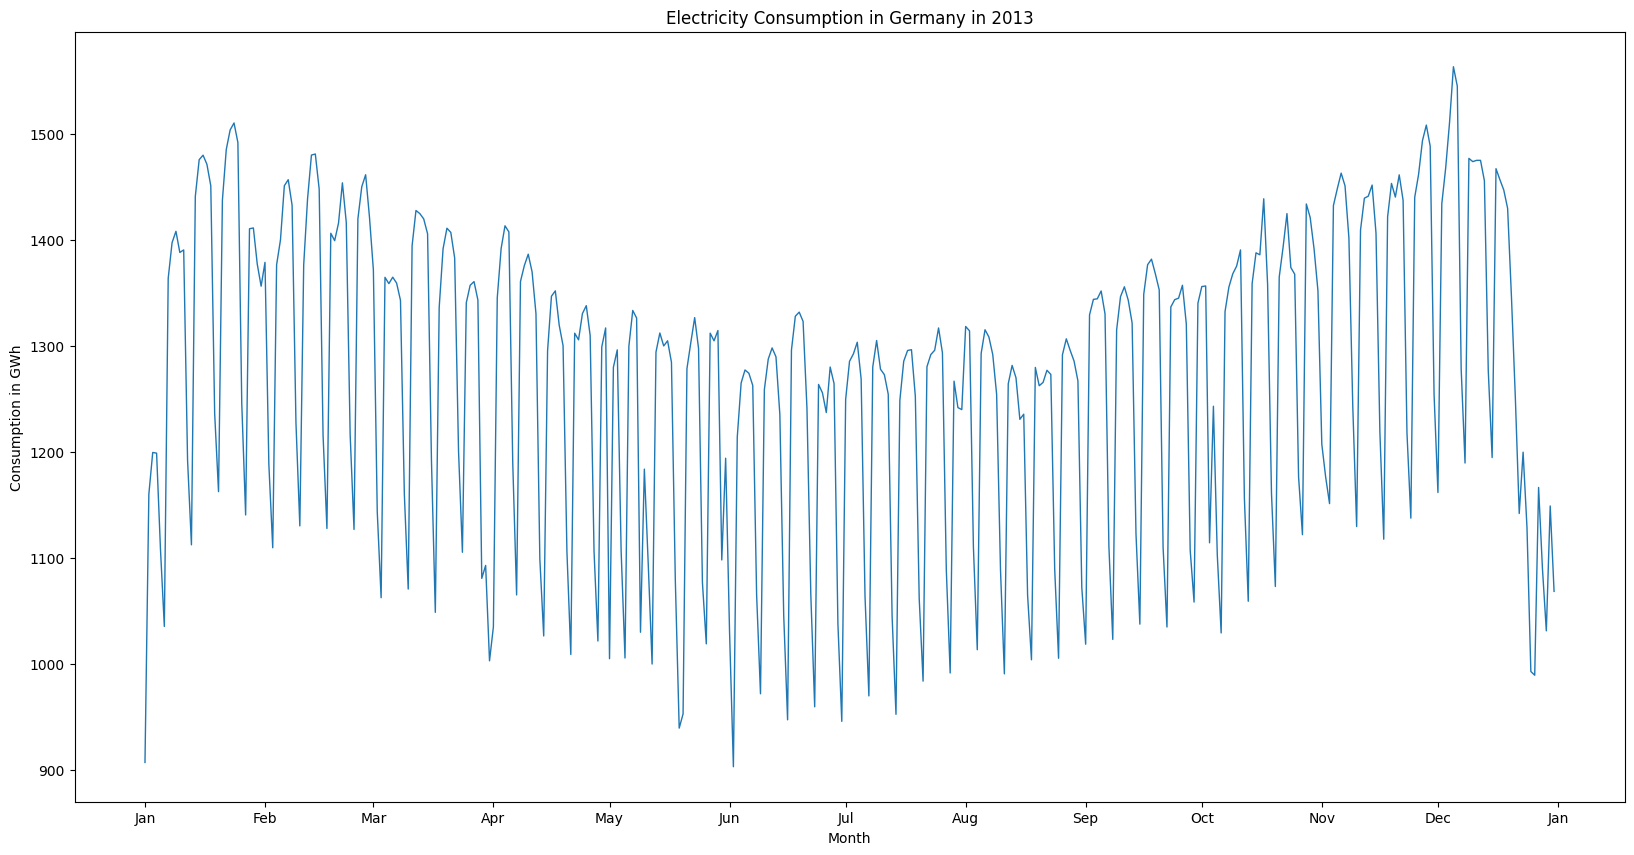

In [11]:
# plotting the plot
plt.figure(figsize=(20, 10))
plt.plot(subset['Consumption'], label='Consumption', linestyle='-', linewidth=1)
plt.xlabel('Month')

# select months on x-axis
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))

plt.ylabel('Consumption in GWh')
plt.title('Electricity Consumption in Germany in {}'.format(SELECTED_YEAR))
plt.show()

On this plot we can see that the consumption is higher in the winter months and lower in the summer months. This is due to the fact that in the winter months the days are shorter and the nights are longer,  so people use more electricity to light

# Calculate and Visualize Monthly Consumption and Generation 

First, resample the data to change the resolution of our dataset to reflect the monthly sums of energy Consumption and generation (split into Wind and Solar). To do so fairly
easily, make yourself familiar with df.resample(...). Finally, create a single time series plot containing monthly sums of Consumption, Wind and Solar from 2006-2017. Try out different colors and styles (e.g. area plots, lineplots, ...) within this single plot and make sure to add a legend

In [12]:
# resampling the data to get montly sums of energy
dataset.index = pd.to_datetime(dataset.index)

monthly_sums = dataset[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].fillna(0).resample('M').sum()

monthly_sums['Difference'] = monthly_sums['Consumption'] - (monthly_sums['Wind'] + monthly_sums['Solar'])
monthly_sums.head()

C:\Users\barte\AppData\Local\Temp\ipykernel_16084\4180826174.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sums = dataset[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].fillna(0).resample('M').sum()


,Consumption,Wind,Solar,Wind+Solar,Difference
Date,,,,,
2006-01-31,45304.704,0.0,0.0,0.0,45304.704
2006-02-28,41078.993,0.0,0.0,0.0,41078.993
2006-03-31,43978.124,0.0,0.0,0.0,43978.124
2006-04-30,38251.767,0.0,0.0,0.0,38251.767
2006-05-31,38858.143,0.0,0.0,0.0,38858.143


### Creating a lineplot with monthly consumption and generation

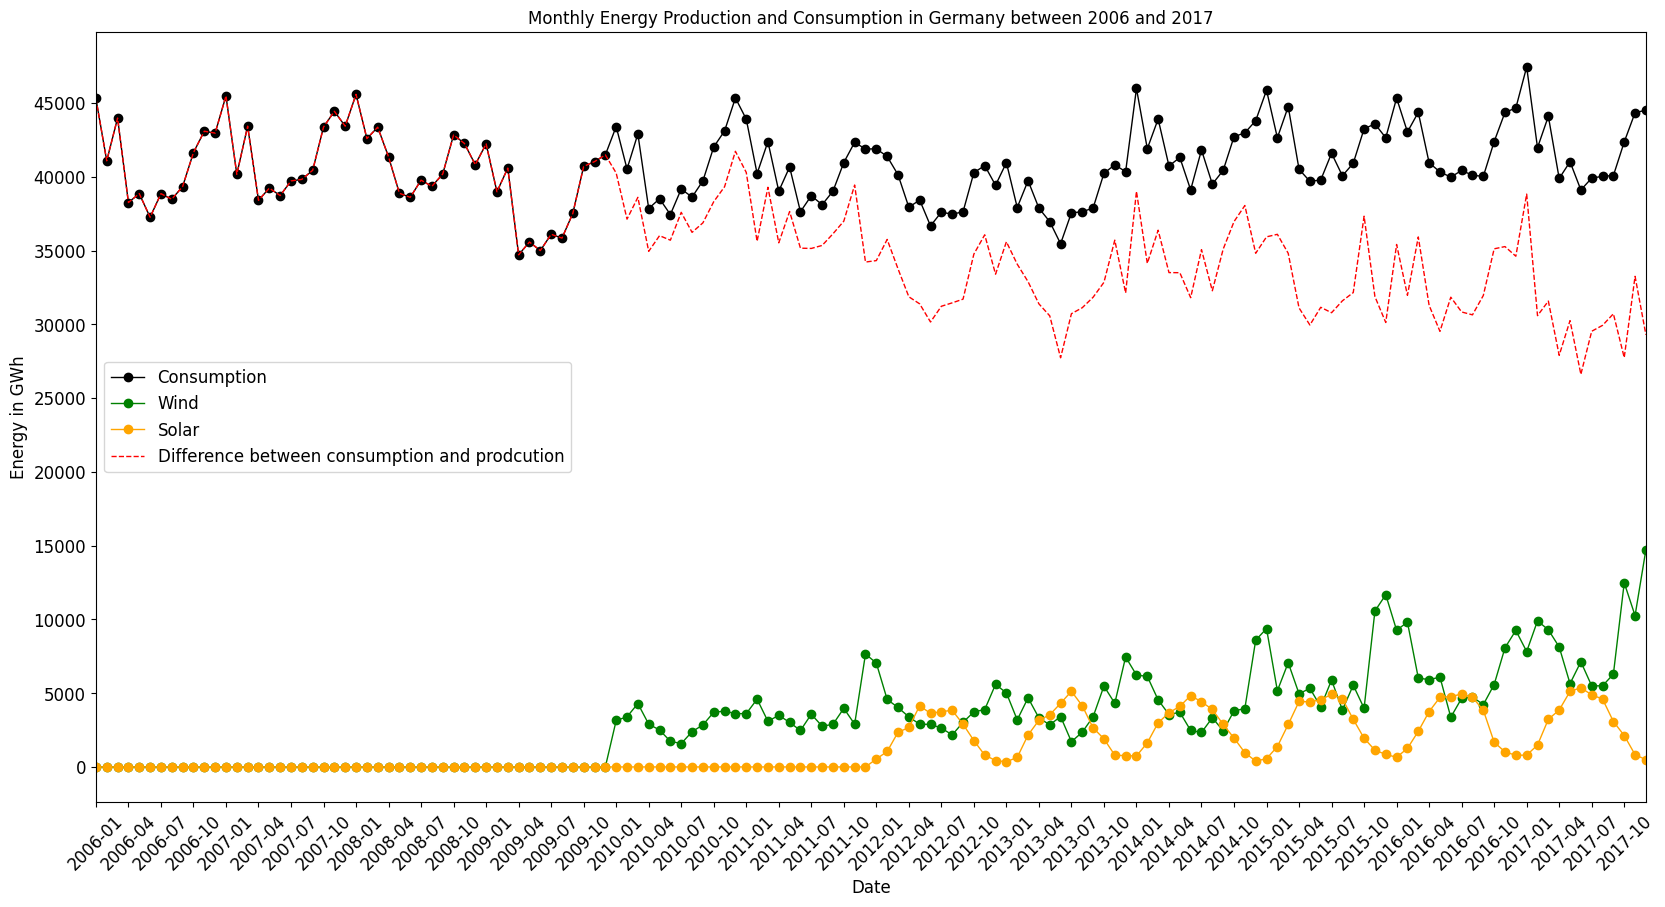

In [13]:
plt.title('Monthly Energy Production and Consumption in Germany between 2006 and 2017')
monthly_sums['Consumption'].plot(kind='line', figsize=(20, 10), linewidth=1, linestyle='-', marker='o', color='black', label='Consumption')
monthly_sums['Wind'].plot(kind='line', figsize=(20, 10), linewidth=1, linestyle='-', marker='o', color='green', label='Wind')
monthly_sums['Solar'].plot(kind='line', figsize=(20, 10), linewidth=1, linestyle='-', marker='o', color='orange', label='Solar')
monthly_sums['Difference'].plot(kind='line', figsize=(20, 10), linewidth=1, linestyle='--', color='red', label='Difference between consumption and prodcution')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy in GWh', fontsize=12)
plt.xticks(
    ticks=monthly_sums.index[::3],  # every 3rd month
    labels=[x.strftime('%Y-%m') for x in monthly_sums.index[::3]],  # format as 'YYYY-MM'
    size=12,
    rotation=45
)
plt.yticks(size=12,
           ticks=np.arange(0, monthly_sums['Consumption'].max(), 5000))
plt.yticks(size=12)
plt.legend(fontsize=12)

### Areaplot with monthly production and consumption

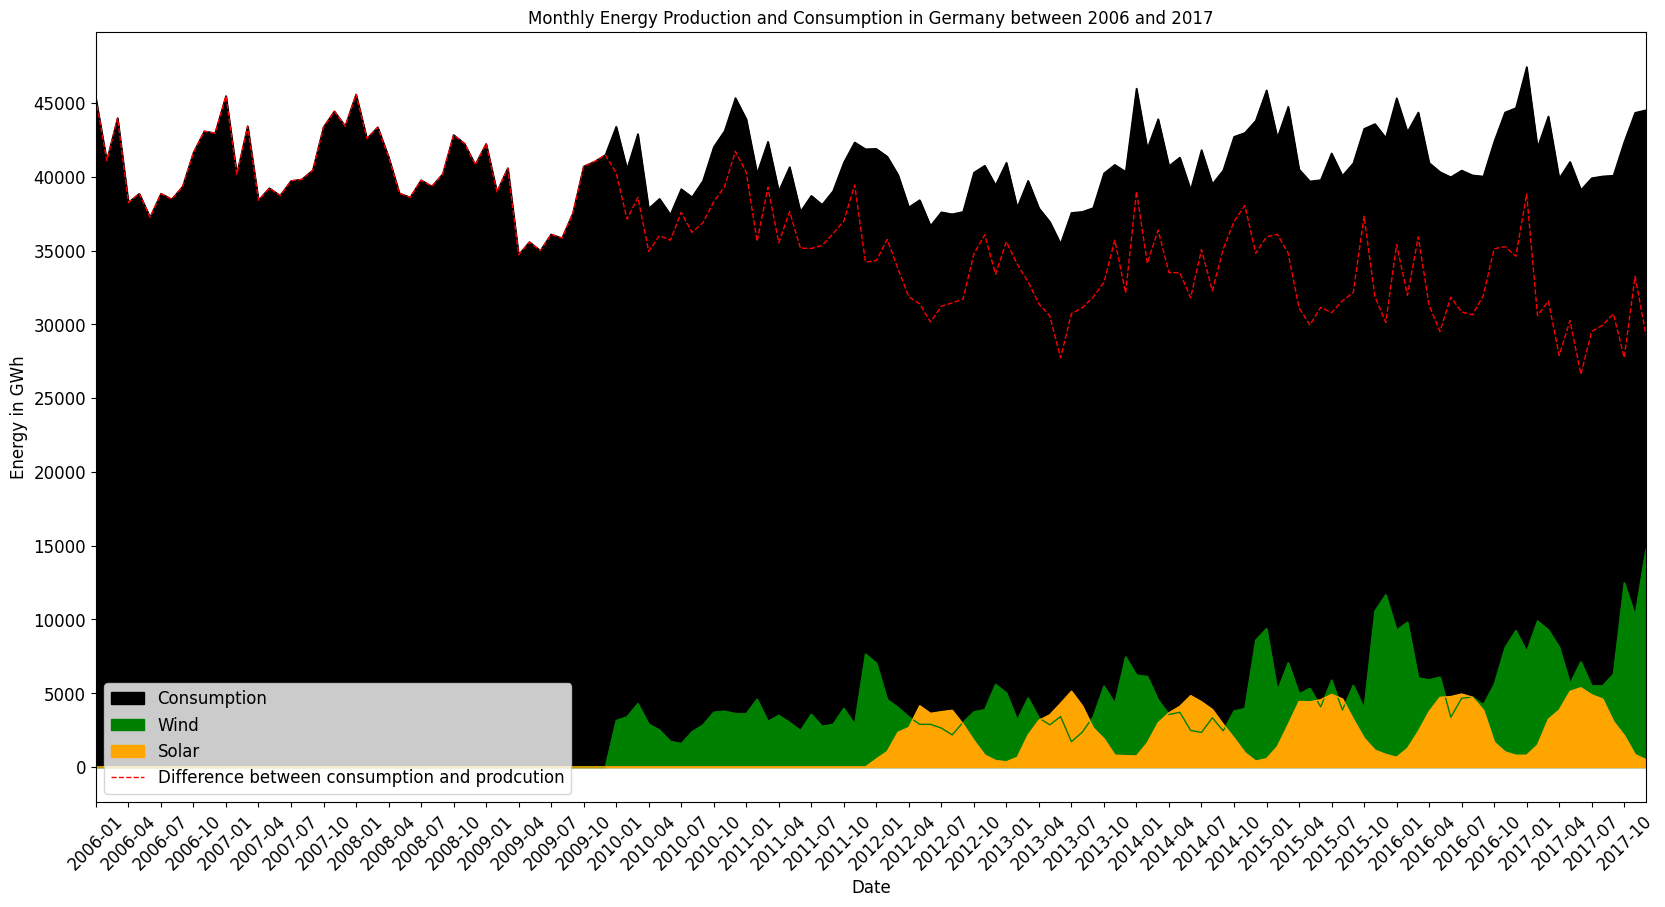

In [14]:
plt.title('Monthly Energy Production and Consumption in Germany between 2006 and 2017')
monthly_sums['Consumption'].plot(kind='area', figsize=(20, 10), linewidth=1, linestyle='-', color='black', label='Consumption')
monthly_sums['Wind'].plot(kind='area', figsize=(20, 10), linewidth=1, linestyle='-', color='green', label='Wind')
monthly_sums['Solar'].plot(kind='area', figsize=(20, 10), linewidth=1, linestyle='-', color='orange', label='Solar')
monthly_sums['Difference'].plot(kind='line', figsize=(20, 10), linewidth=1, linestyle='--', color='red', label='Difference between consumption and prodcution')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy in GWh', fontsize=12)
plt.xticks(
    ticks=monthly_sums.index[::3],  # every 3rd month
    labels=[x.strftime('%Y-%m') for x in monthly_sums.index[::3]],  # format as 'YYYY-MM'
    size=12,
    rotation=45
)
plt.yticks(size=12,
           ticks=np.arange(0, monthly_sums['Consumption'].max(), 5000))
plt.yticks(size=12)
plt.legend(fontsize=12, loc='lower left')

# Use Your Own Data!

Go to Wiki Pageviews and download a dataset of the pageviews of a Wikipedia page of your choice : 
1. Enter the page name(s) you want to find out more about
- Stephen Curry and NBA Finals
2. Click into the Dates field and choose All time, then download the .csv file and load it into your notebook.
3. Change the index to make use of timebased indexing (DateTimeIndex).
4. Inspect the dataset (missing values?)
5. Check for patterns in your data (e.g. selecting just one year/month, grouping month-
ly/weekly, ...)
6. Finally, show at least one plot with a weekly aggregate of numbers

#### Loading the dataset

In [15]:
# loading data
dataset = pd.read_csv('daily_pageviews.csv')

dataset['Date'] = pd.to_datetime(dataset['Date'])

# # setting the date as the index
dataset.set_index('Date', inplace=True)

# # displaying the first few rows
dataset.head()

,Stephen Curry,NBA Finals
Date,,
2015-07-01,13313,1306
2015-07-02,13295,1414
2015-07-03,12106,1326
2015-07-04,11254,1230
2015-07-05,10355,1162


#### Looking for missing values

In [16]:
missing_values = dataset.isnull().sum()
print("Amount of missing values in the dataset:")
print(missing_values)

Amount of missing values in the dataset:
Stephen Curry    0
NBA Finals       0
dtype: int64


#### Looking for patterns in dataset

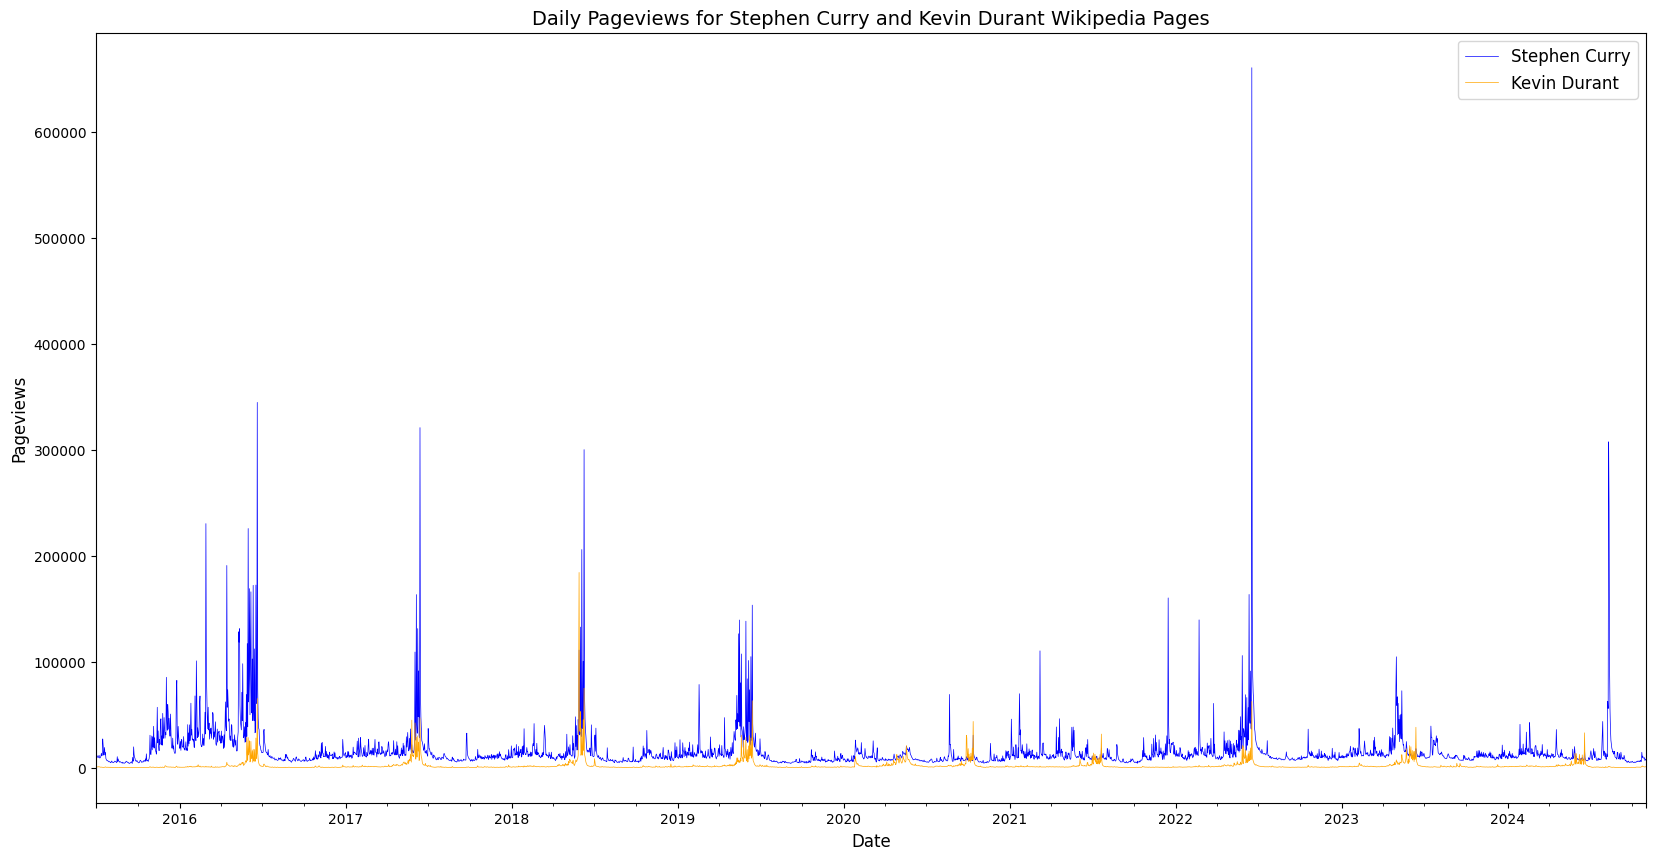

In [17]:
plt.figure(figsize=(20, 10))
dataset['Stephen Curry'].plot(linestyle='-', linewidth=0.5, color='blue', label='Stephen Curry')
dataset['NBA Finals'].plot(linestyle='-', linewidth=0.5, color='orange', label='Kevin Durant')
plt.title('Daily Pageviews for Stephen Curry and Kevin Durant Wikipedia Pages', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Pageviews', fontsize=12)
plt.legend(fontsize=12)


We can see that there are overlaping spikes with amount of pageviews of Stephen Curry and NBA Finals

#### Monthly Resample

In [18]:
monthly_sums = dataset.resample('M').sum()
monthly_sums.head()

C:\Users\barte\AppData\Local\Temp\ipykernel_16084\3668134891.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sums = dataset.resample('M').sum()


,Stephen Curry,NBA Finals
Date,,
2015-07-31,359107,31585
2015-08-31,186681,21684
2015-09-30,204820,17554
2015-10-31,269904,20950
2015-11-30,868626,26543


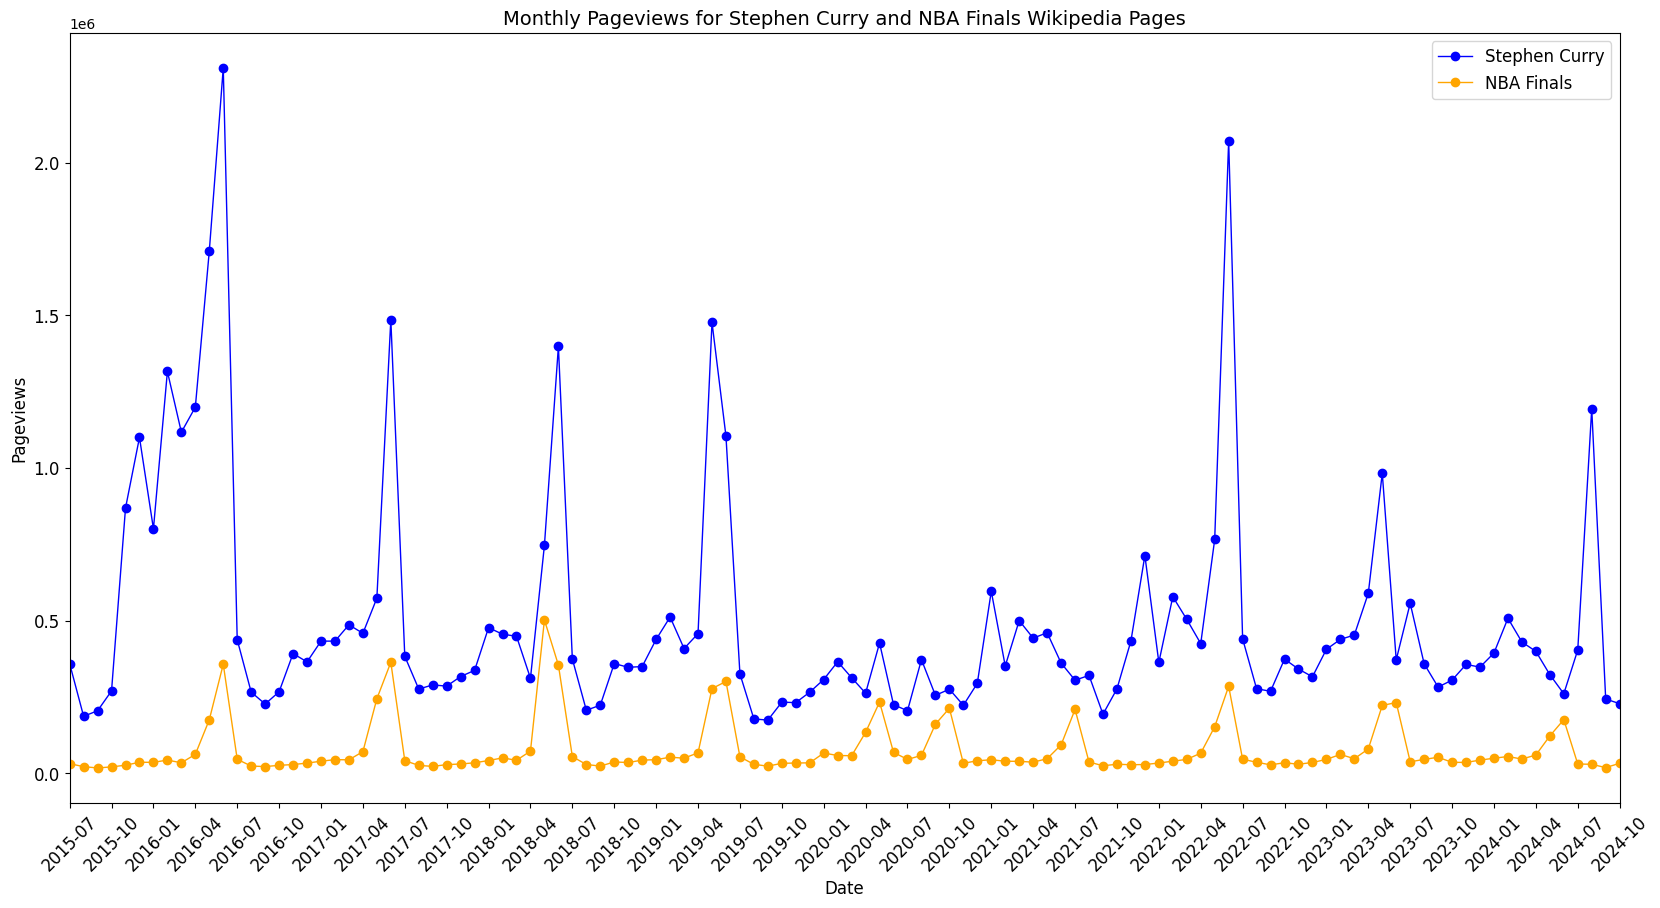

In [19]:
monthly_sums['Stephen Curry'].plot(kind='line', figsize=(20, 10), linewidth=1, linestyle='-', marker='o', color='blue', label='Stephen Curry')
monthly_sums['NBA Finals'].plot(kind='line', figsize=(20, 10), linewidth=1, linestyle='-', marker='o', color='orange', label='NBA Finals')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Pageviews', fontsize=12)
plt.title('Monthly Pageviews for Stephen Curry and NBA Finals Wikipedia Pages', fontsize=14)
plt.xticks(
    ticks=monthly_sums.index[::3],  # every 3rd month
    labels=[x.strftime('%Y-%m') for x in monthly_sums.index[::3]],  # format as 'YYYY-MM'
    size=12,
    rotation=45
)
plt.yticks(size=12)
plt.legend(fontsize=12)


The reason fro spikes in the data is because of the NBA finals and they took place in June each year. The spikes are due to the popularity of the event

On the other hand Stephen Curry is the most popular player in the NBA. The spikes are due to the popularity of the player and the games he played in especially in the finals in the years : 2016, 2017, 2018 and 2022

#### Grouped Boxplot

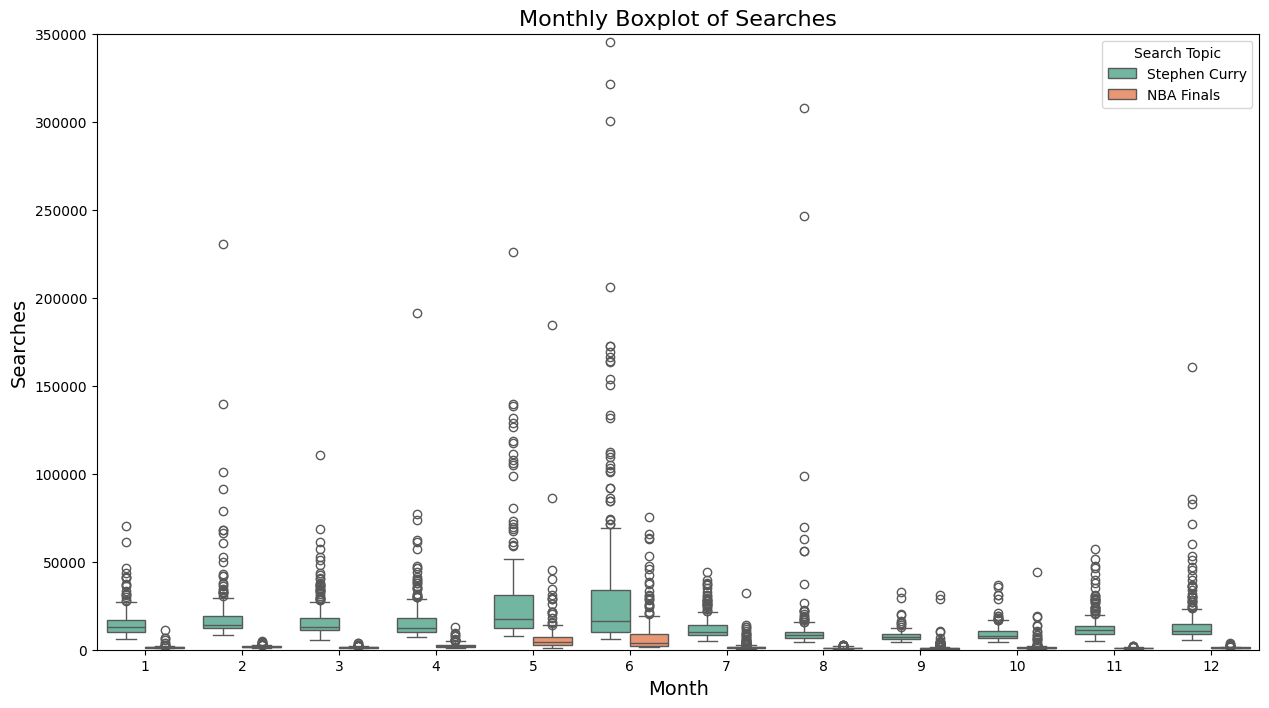

In [23]:
df = dataset.copy()
df['Year'] = pd.DatetimeIndex(df.index).year
df['Month'] = pd.DatetimeIndex(df.index).month

# Reshape the data for grouped boxplot
long_data = pd.melt(
    df,
    id_vars=['Month'],  # Keep 'Month' for grouping
    value_vars=['Stephen Curry', 'NBA Finals'],  # Columns to unpivot
    var_name='Topic',  # New column name for variable names
    value_name='Searches'  # New column name for values
)

# Create a boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=long_data, x='Month', y='Searches', hue='Topic', palette='Set2')

plt.ylim(0, 350000)  # Set y-axis range (adjust based on your data)

# Customize the plot
plt.title('Monthly Boxplot of Searches', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Searches', fontsize=14)
plt.legend(title='Search Topic', loc='upper right')

# Show the plot
plt.show()